In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import STL

In [2]:
data = pd.read_csv('/content/hungary_chickenpox.csv')

In [4]:
print(data.head())
print(data.describe())
print(data.info())

         Date  BUDAPEST  BARANYA  BACS  BEKES  BORSOD  CSONGRAD  FEJER  GYOR  \
0  03/01/2005       168       79    30    173     169        42    136   120   
1  10/01/2005       157       60    30     92     200        53     51    70   
2  17/01/2005        96       44    31     86      93        30     93    84   
3  24/01/2005       163       49    43    126      46        39     52   114   
4  31/01/2005       122       78    53     87     103        34     95   131   

   HAJDU  ...  JASZ  KOMAROM  NOGRAD  PEST  SOMOGY  SZABOLCS  TOLNA  VAS  \
0    162  ...   130       57       2   178      66        64     11   29   
1     84  ...    80       50      29   141      48        29     58   53   
2    191  ...    64       46       4   157      33        33     24   18   
3    107  ...    63       54      14   107      66        50     25   21   
4    172  ...    61       49      11   124      63        56      7   47   

   VESZPREM  ZALA  
0        87    68  
1        68    26  
2 

In [5]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

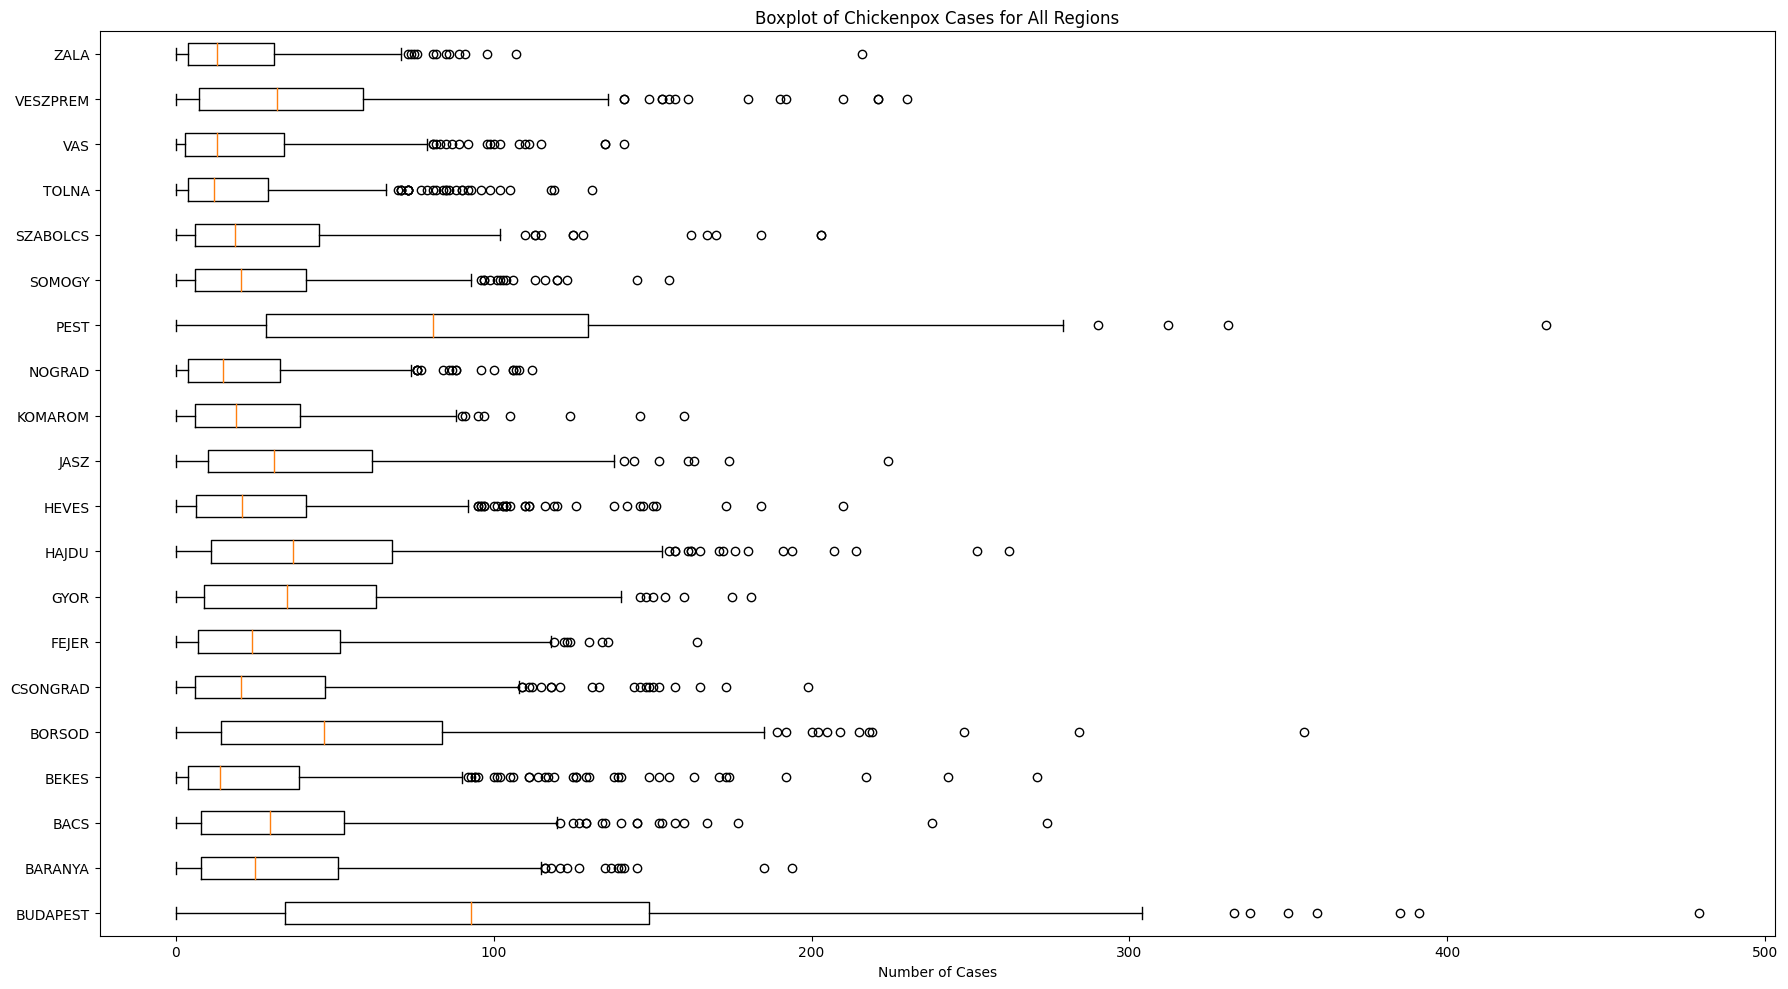

In [6]:
# Data Exploration: Boxplots
plt.figure(figsize=(18, 10))
plt.boxplot([data[region] for region in data.columns if region != 'Date'], vert=False)
plt.yticks(range(1, len(data.columns)), [region for region in data.columns if region != 'Date'])
plt.title('Boxplot of Chickenpox Cases for All Regions')
plt.xlabel('Number of Cases')
plt.tight_layout()
plt.show()

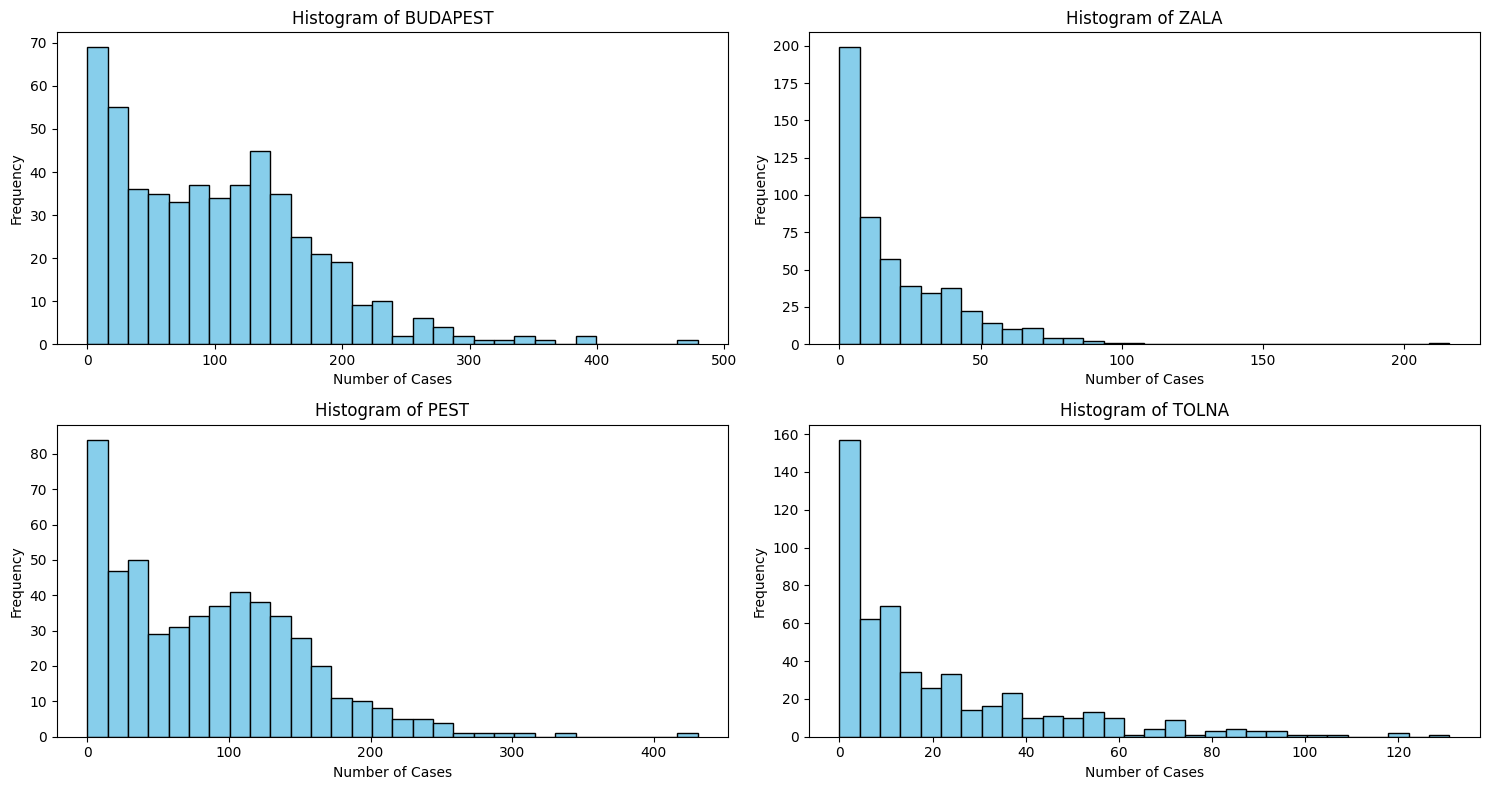

In [7]:
# Data Exploration: Histograms
selected_regions = ["BUDAPEST", "ZALA", "PEST", "TOLNA"]
plt.figure(figsize=(15, 8))
for idx, region in enumerate(selected_regions, 1):
    plt.subplot(2, 2, idx)
    plt.hist(data[region], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {region}')
    plt.xlabel('Number of Cases')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

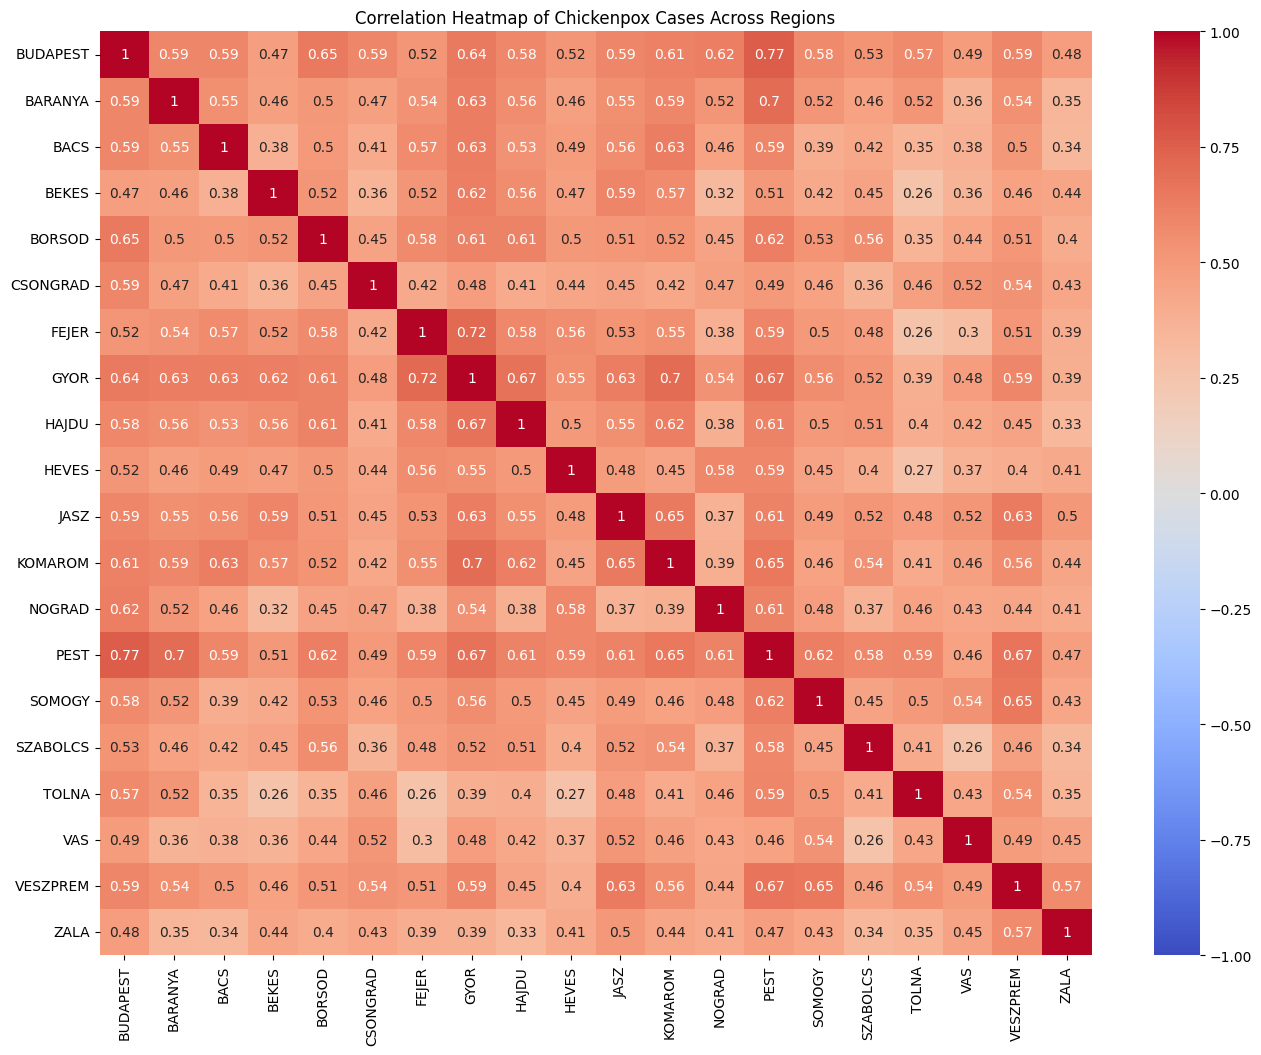

In [8]:
# Data Exploration: Heatmap of Correlations
correlation_matrix = data.drop(columns=['Date']).corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Chickenpox Cases Across Regions')
plt.show()

<ipython-input-9-98a7fe3f28ea>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_data = data.groupby(data['Date'].dt.year).sum().reset_index()


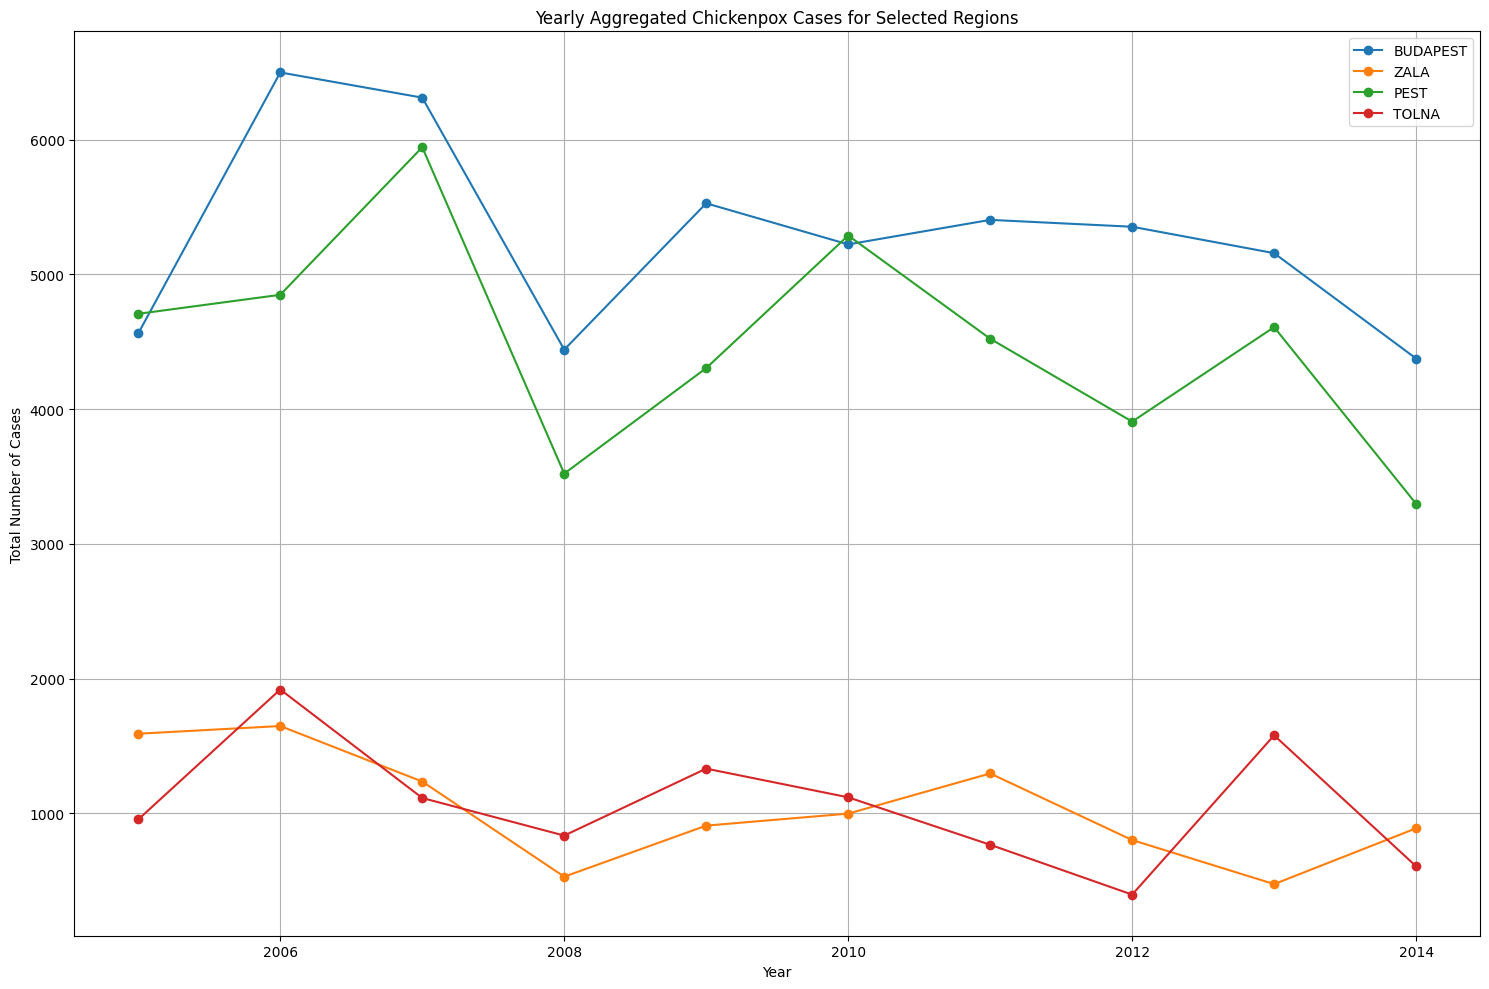

In [9]:
# Data Exploration: Yearly Aggregated Plot
yearly_data = data.groupby(data['Date'].dt.year).sum().reset_index()
plt.figure(figsize=(15, 10))
for region in selected_regions:
    plt.plot(yearly_data['Date'], yearly_data[region], label=region, marker='o')
plt.title('Yearly Aggregated Chickenpox Cases for Selected Regions')
plt.xlabel('Year')
plt.ylabel('Total Number of Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
# Data Clustering
yearly_data_cluster = yearly_data.drop(columns=['Date'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(yearly_data_cluster.T)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
clustered_regions = pd.DataFrame({'Region': yearly_data_cluster.columns, 'Cluster': clusters})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


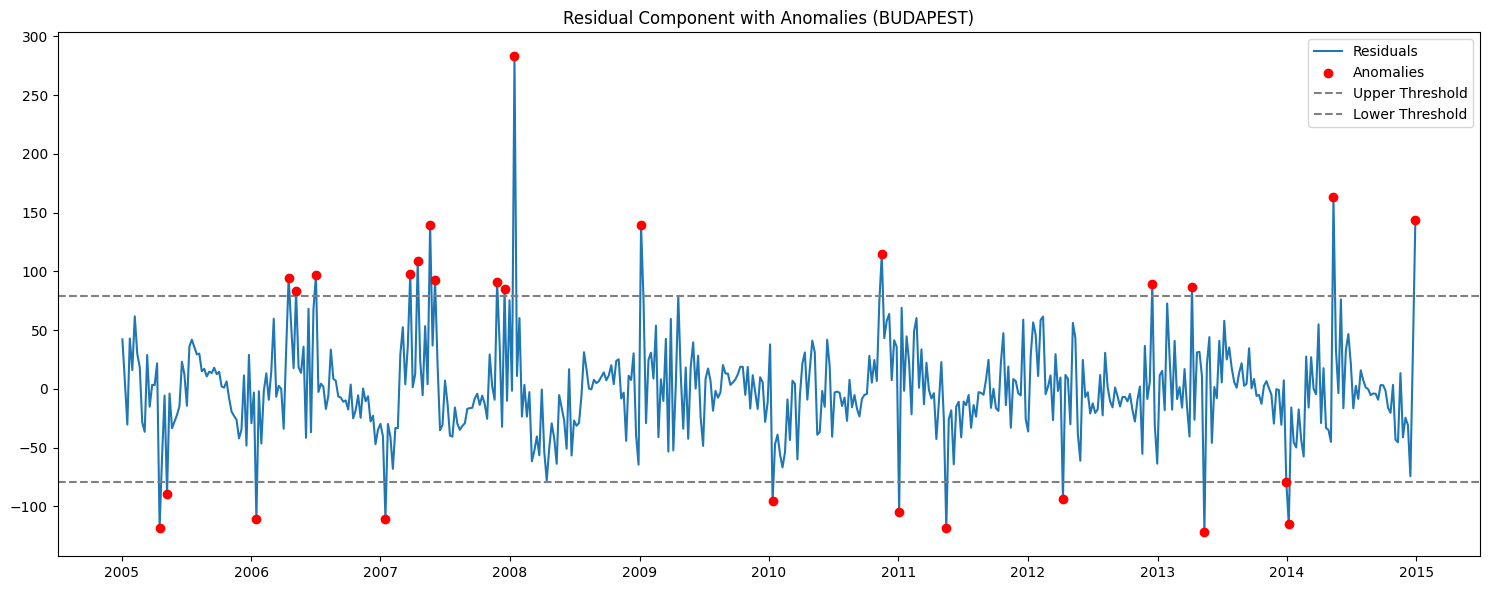

In [11]:
# Anomaly Detection for BUDAPEST
budapest_series = data.set_index('Date')['BUDAPEST']
stl = STL(budapest_series, seasonal=53)
result = stl.fit()
residual_mean = result.resid.mean()
residual_std = result.resid.std()
anomaly_threshold_upper = residual_mean + 2 * residual_std
anomaly_threshold_lower = residual_mean - 2 * residual_std
anomalies = result.resid[(result.resid > anomaly_threshold_upper) | (result.resid < anomaly_threshold_lower)]
plt.figure(figsize=(15, 6))
plt.plot(result.resid, label='Residuals')
plt.scatter(anomalies.index, anomalies.values, color='red', label='Anomalies', zorder=5)
plt.axhline(anomaly_threshold_upper, color='grey', linestyle='--', label='Upper Threshold')
plt.axhline(anomaly_threshold_lower, color='grey', linestyle='--', label='Lower Threshold')
plt.title('Residual Component with Anomalies (BUDAPEST)')
plt.legend()
plt.tight_layout()
plt.show()